<a href="https://colab.research.google.com/github/cliverFray/cliverAImodels/blob/main/BPA_Random_Forest_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Random Forest

# Breast Cancer

## BUSINESS UNDERSTANDING
* Clasificar por predicción si es maligno o benigno

**Caso**: Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Se describen las características de los núcleos celulares presentes en la imagen.

Estructura :
* 1) ID number
* 2) Diagnosis (M = malignant, B = benign)
* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

Missing attribute values: none

Class distribution: 357 benign, 212 malignant. Total = 569

Columns : 32

## IMPORTAR LAS LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# En google collab
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA COLLECT

In [ ]:
# Lectura del dataset
breast_df = pd.read_csv('/content/drive/MyDrive/UPC_2023/00_DATASETS/breast_cancer.csv') # archivo separado por TABs '\space'

In [ ]:
print(breast_df.shape)
breast_df.head()

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target_diagnosis
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,1
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,1
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,1


## TODAS LAS ETAPAS DE DATA PREPROCESSING

## MODELING

### Separar las variables predictoras y la target

In [ ]:
X = breast_df.drop(['target_diagnosis'], axis = 1)
y = breast_df['target_diagnosis']

### Separar entre train y test (técnica 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


### Modelo

In [ ]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Instanciamos el modelo
modelo_RandomForest = RandomForestClassifier()
#modelo_RandomForest = RandomForestClassifier(n_estimators=200,max_samples=80, min_samples_split=20)
#modelo_RandomForest = RandomForestClassifier(max_depth=3, criterion='entropy')
#modelo_RandomForest = RandomForestClassifier(max_depth=3, criterion='gini')
#modelo_RandomForest = RandomForestClassifier(min_samples_split=200, criterion='gini')


In [ ]:
#Entrenamos el modelo
modelo_RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predecimos usando los datos de test
y_pred_RandomForest       = modelo_RandomForest.predict(X_test)
y_pred_RandomForest_proba = modelo_RandomForest.predict_proba(X_test)
y_pred_RandomForest_proba[:,1][:10]

array([0.91, 0.33, 0.06, 0.22, 0.13, 0.01, 0.13, 0.06, 0.48, 0.01])

In [ ]:
#Como apoyo podemos crear una tabla con los valores reales (y_test) vs las predicciones(y_pred)
df_comparar = pd.DataFrame()
df_comparar = X_test.copy()
df_comparar["y_test_RandomForest"] = y_test
df_comparar["y_pred_RandomForest"] = y_pred_RandomForest
df_comparar["y_pred_proba_RandomForest"] = y_pred_RandomForest_proba[:,1][:]
df_comparar.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_test_RandomForest,y_pred_RandomForest,y_pred_proba_RandomForest
512,13.400,20.520,88.640,556.700,0.111,0.147,0.144,0.082,0.212,0.073,...,844.400,0.157,0.386,0.511,0.205,0.358,0.111,1,1,0.910
457,13.210,25.250,84.100,537.900,0.088,0.052,0.028,0.021,0.162,0.056,...,632.900,0.129,0.106,0.139,0.060,0.244,0.068,0,0,0.330
439,14.020,15.660,89.590,606.500,0.080,0.056,0.021,0.027,0.159,0.056,...,688.900,0.103,0.102,0.063,0.082,0.214,0.067,0,0,0.060
298,14.260,18.170,91.220,633.100,0.066,0.052,0.025,0.014,0.164,0.056,...,819.700,0.094,0.217,0.157,0.075,0.264,0.077,0,0,0.220
37,13.030,18.420,82.610,523.800,0.090,0.038,0.026,0.029,0.147,0.059,...,545.900,0.097,0.046,0.048,0.050,0.199,0.062,0,0,0.130


## EVALUATION

In [ ]:
#Importamos las métricas
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,classification_report,\
                            accuracy_score,precision_score,recall_score

In [ ]:
confusion_matrix_RandomForest = confusion_matrix(y_test,y_pred_RandomForest)

In [ ]:
#Mostrar el confusion matrix como dataframe
pd.DataFrame(confusion_matrix_RandomForest,columns = ['Prediccion NO','Prediccion SI'], index = ['Real NO','Real SI'])

,Prediccion NO,Prediccion SI
Real NO,63,6
Real SI,4,41


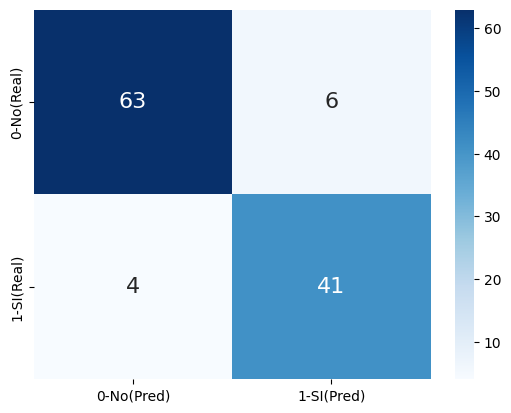

In [ ]:
#Mostrar el confusion matrix como grafico
sns.heatmap(confusion_matrix_RandomForest, annot=True,xticklabels=['0-No(Pred)','1-SI(Pred)'],
            yticklabels=['0-No(Real)','1-SI(Real)'], cmap = 'Blues',annot_kws={"size": 16});

In [ ]:
TN = confusion_matrix_RandomForest[0][0]
FP = confusion_matrix_RandomForest[0][1] #tipo I
FN = confusion_matrix_RandomForest[1][0] #tipo II
TP = confusion_matrix_RandomForest[1][1]
print( TN , FP, FN, TP)

63 6 4 41


In [ ]:
acc_RandomForest  = accuracy_score(y_test,y_pred_RandomForest)
f1_RandomForest   = f1_score(y_test,y_pred_RandomForest)
prec_RandomForest = precision_score(y_test, y_pred_RandomForest)
rec_RandomForest  = recall_score(y_test, y_pred_RandomForest)
auc_RandomForest  = roc_auc_score(y_test,y_pred_RandomForest_proba[:,1])

In [ ]:
results = pd.DataFrame([['Random Forest', acc_RandomForest,f1_RandomForest,prec_RandomForest,rec_RandomForest,auc_RandomForest]],
                       columns = ['Model','Accuracy','F1','Precision','Recall','AUC'])

In [ ]:
results

,Model,Accuracy,F1,Precision,Recall,AUC
0,Random Forest,0.912,0.891,0.872,0.911,0.965


In [ ]:
#Comprobar el FP
df_comparar[(df_comparar['y_test_RandomForest']==0) & (df_comparar['y_pred_RandomForest']==1)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_test_RandomForest,y_pred_RandomForest,y_pred_proba_RandomForest
15,14.540,27.540,96.730,658.800,0.114,0.160,0.164,0.074,0.230,0.071,...,943.200,0.168,0.658,0.703,0.171,0.422,0.134,0,1,0.780
12,19.170,24.800,132.400,1123.000,0.097,0.246,0.206,0.112,0.240,0.078,...,1332.000,0.104,0.390,0.364,0.177,0.318,0.102,0,1,0.580
471,12.040,28.140,76.850,449.900,0.088,0.060,0.024,0.024,0.185,0.057,...,567.600,0.104,0.097,0.055,0.055,0.240,0.066,0,1,0.600
340,14.420,16.540,94.150,641.200,0.098,0.114,0.080,0.042,0.191,0.064,...,862.100,0.129,0.337,0.376,0.141,0.305,0.088,0,1,0.570
45,18.650,17.600,123.700,1076.000,0.110,0.169,0.197,0.101,0.191,0.060,...,1567.000,0.168,0.509,0.735,0.238,0.380,0.092,0,1,0.940
413,14.990,22.110,97.530,693.700,0.085,0.102,0.069,0.039,0.194,0.059,...,867.100,0.108,0.335,0.311,0.131,0.316,0.093,0,1,0.570


## VER LOS PARAMETROS

In [ ]:
modelo_RandomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Número de arboles generados
modelo_RandomForest.n_estimators

100

In [ ]:
#Numero de variables usadas
modelo_RandomForest.n_features_in_

30

In [ ]:
#Arbol en indice 5
estimator = modelo_RandomForest.estimators_[5]

## VIENDO EL ARBOL


In [ ]:
from sklearn import tree

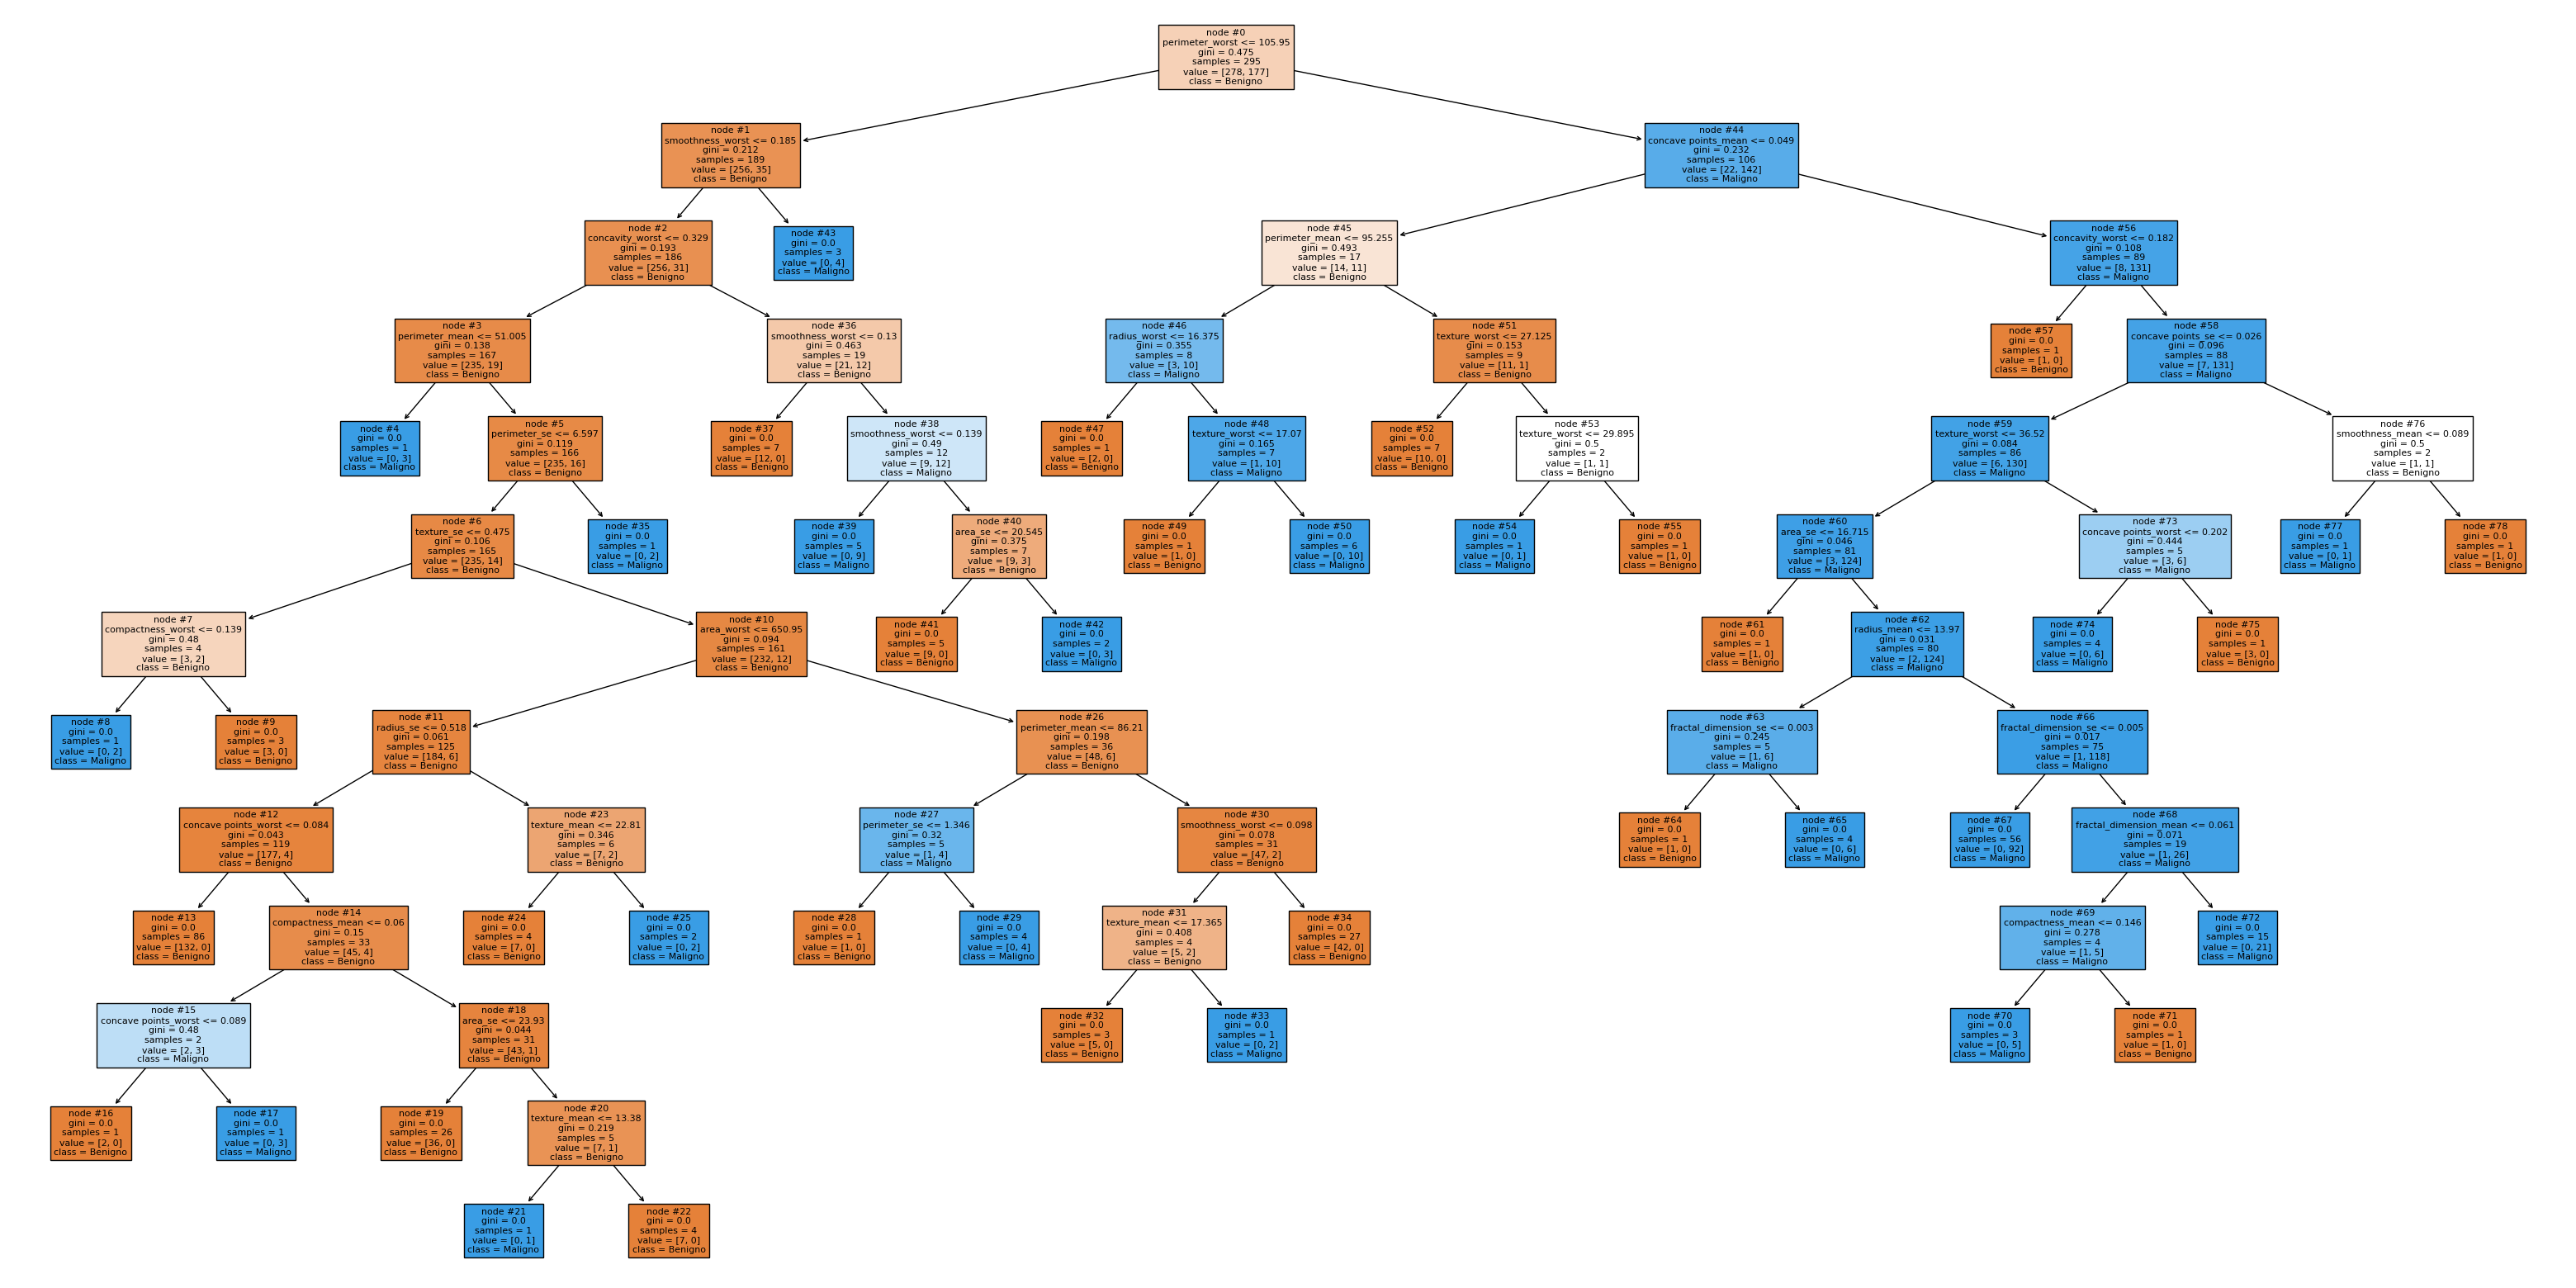

In [ ]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(estimator,
                   feature_names=X.columns,
                   class_names=['Benigno','Maligno'],node_ids=True,
                   filled=True)
#fig.savefig("decistion_tree.png")

## Extraccion de nodo principal

In [ ]:
## Donde terminan los  pacientes.
nodos = modelo_RandomForest.apply(X_test)
nodos[0] #Paciente 1 en el nodo XX

array([83, 88, 63, 46, 61, 65, 64, 71, 62, 62, 58, 70, 71, 76, 73, 56, 62,
       60, 74, 66, 66, 76, 68, 40, 55, 45, 57, 71, 65, 50, 72, 65, 70, 68,
       63, 66, 84, 67, 66, 64, 70, 40, 71, 59, 68, 77, 81, 85, 60, 59, 71,
       70, 70, 65, 79, 62, 68, 40, 53, 67, 65, 37, 60, 62, 57, 62, 58, 77,
       48, 49, 65, 64, 55, 68, 76, 79, 62, 66, 66, 53, 77, 65, 70, 64, 58,
       60, 42, 72, 55, 51, 53, 78, 51, 77, 58, 65, 83, 67, 37, 61])

In [ ]:
nodos.shape

(114, 100)

In [ ]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,13.400,20.520,88.640,556.700,0.111,0.147,0.144,0.082,0.212,0.073,...,16.410,29.660,113.300,844.400,0.157,0.386,0.511,0.205,0.358,0.111
457,13.210,25.250,84.100,537.900,0.088,0.052,0.028,0.021,0.162,0.056,...,14.350,34.230,91.290,632.900,0.129,0.106,0.139,0.060,0.244,0.068
439,14.020,15.660,89.590,606.500,0.080,0.056,0.021,0.027,0.159,0.056,...,14.910,19.310,96.530,688.900,0.103,0.102,0.063,0.082,0.214,0.067
298,14.260,18.170,91.220,633.100,0.066,0.052,0.025,0.014,0.164,0.056,...,16.220,25.260,105.800,819.700,0.094,0.217,0.157,0.075,0.264,0.077
37,13.030,18.420,82.610,523.800,0.090,0.038,0.026,0.029,0.147,0.059,...,13.300,22.810,84.460,545.900,0.097,0.046,0.048,0.050,0.199,0.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,17.420,25.560,114.500,948.000,0.101,0.115,0.168,0.066,0.131,0.059,...,18.070,28.070,120.400,1021.000,0.124,0.179,0.280,0.110,0.160,0.068
519,12.750,16.700,82.510,493.800,0.113,0.112,0.039,0.030,0.212,0.066,...,14.450,21.740,93.630,624.100,0.147,0.198,0.142,0.080,0.307,0.086
432,20.180,19.540,133.800,1250.000,0.113,0.149,0.213,0.126,0.172,0.061,...,22.030,25.070,146.000,1479.000,0.167,0.294,0.531,0.217,0.303,0.081
516,18.310,20.580,120.800,1052.000,0.107,0.125,0.157,0.095,0.186,0.059,...,21.860,26.200,142.200,1493.000,0.149,0.254,0.376,0.151,0.307,0.079
